# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

In [3]:
cities

['pangnirtung',
 'lebu',
 'kuala%20terengganu',
 'muros',
 'mehamn',
 'ushuaia',
 'bredasdorp',
 'yellowknife',
 'la%20ronge',
 'taolanaro',
 'yar-sale',
 'iqaluit',
 'atambua',
 'leningradskiy',
 'vanimo',
 'olinda',
 'barentsburg',
 'punta%20arenas',
 'bluff',
 'nikolskoye',
 'avarua',
 'seymchan',
 'asfi',
 'hami',
 'new%20norfolk',
 'mataura',
 'kapaa',
 'thanh%20hoa',
 'vila%20franca%20do%20campo',
 'mirnyy',
 'mayumba',
 'tiksi',
 'saint-philippe',
 'rikitea',
 'dikson',
 'qaanaaq',
 'naze',
 'huzhou',
 'faanui',
 'salalah',
 'albany',
 'kodiak',
 'constitucion',
 'hilo',
 'carnarvon',
 'sao%20joao%20da%20barra',
 'port%20elizabeth',
 'oromocto',
 'vaini',
 'cidreira',
 'bandarbeyla',
 'guerrero%20negro',
 'mikkeli',
 'lasa',
 'upernavik',
 'victoria',
 'mrirt',
 'provideniya',
 'hermanus',
 'grand%20river%20south%20east',
 'oktyabrskoye',
 'petrovskaya',
 'bethel',
 'itarema',
 'jamestown',
 'lagoa',
 'tasiilaq',
 'saldanha',
 'kabanjahe',
 'sumbawa',
 'narsaq',
 'port%20alfred'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# OpenWeatherMap API Key and setup
api_key = api_keys.api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

In [5]:
# Placeholders for data collection 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Counter to facilitate printing secuense
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
    
print("-----------------------------")
print("---Data Retrieval Complete---")     
print("-----------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Pangnirtung
Processing Record 2 | Lebu
Processing Record 3 | Kuala Terengganu
Processing Record 4 | Muros
Processing Record 5 | Mehamn
Processing Record 6 | Ushuaia
Processing Record 7 | Bredasdorp
Processing Record 8 | Yellowknife
Processing Record 9 | La Ronge
City not found. Skipping...
Processing Record 10 | Yar-Sale
Processing Record 11 | Iqaluit
Processing Record 12 | Atambua
Processing Record 13 | Leningradskiy
Processing Record 14 | Vanimo
Processing Record 15 | Olinda
City not found. Skipping...
Processing Record 16 | Punta Arenas
Processing Record 17 | Bluff
Processing Record 18 | Nikolskoye
Processing Record 19 | Avarua
Processing Record 20 | Seymchan
City not found. Skipping...
Processing Record 21 | Hami
Processing Record 22 | New Norfolk
Processing Record 23 | Mataura
Processing Record 24 | Kapaa
Processing Record 25 | Thanh Hoa
Processing Record 26 | Vila Franca do Campo
Processing Record 27 |

Processing Record 223 | Mega
City not found. Skipping...
Processing Record 224 | Anadyr
Processing Record 225 | Palmer
Processing Record 226 | Latung
Processing Record 227 | Tabuk
Processing Record 228 | Susurluk
City not found. Skipping...
Processing Record 229 | Cherskiy
Processing Record 230 | Vila do Maio
Processing Record 231 | Hithadhoo
Processing Record 232 | Berlevag
Processing Record 233 | Ahuimanu
Processing Record 234 | Cayenne
Processing Record 235 | Wad Rawah
Processing Record 236 | Dunedin
Processing Record 237 | Tautira
Processing Record 238 | Gouvy
Processing Record 239 | Butaritari
City not found. Skipping...
City not found. Skipping...
Processing Record 240 | Half Moon Bay
Processing Record 241 | Castro
City not found. Skipping...
Processing Record 242 | Skowhegan
City not found. Skipping...
Processing Record 243 | Sola
Processing Record 244 | Hailun
Processing Record 245 | Bien Hoa
Processing Record 246 | Kostino
City not found. Skipping...
Processing Record 247 | Zu

Processing Record 444 | Port-Gentil
Processing Record 445 | Evensk
Processing Record 446 | Pauri
Processing Record 447 | Viloco
Processing Record 448 | Kanigoro
Processing Record 449 | Te Anau
City not found. Skipping...
Processing Record 450 | Plettenberg Bay
Processing Record 451 | Berezovyy
Processing Record 452 | Nagod
Processing Record 453 | Uaua
Processing Record 454 | Narasannapeta
Processing Record 455 | Pauini
Processing Record 456 | Karratha
Processing Record 457 | Chumikan
Processing Record 458 | Christchurch
City not found. Skipping...
Processing Record 459 | Baykit
Processing Record 460 | Svetlogorsk
Processing Record 461 | Veraval
Processing Record 462 | Haag
Processing Record 463 | Sanwer
Processing Record 464 | Barra do Garcas
Processing Record 465 | Coolum Beach
Processing Record 466 | Ha Giang
Processing Record 467 | Omsukchan
Processing Record 468 | Hovd
Processing Record 469 | Huarmey
City not found. Skipping...
Processing Record 470 | Blythe
Processing Record 471 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          543
Cloudiness    543
Country       543
Date          543
Humidity      543
Lat           543
Lng           543
Max Temp      543
Wind Speed    543
dtype: int64

In [7]:
# Save data frame to CSV
weather_data.to_csv('...weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Pangnirtung,8,CA,1554171513,58,66.15,-65.72,-6.78,3.18
1,Lebu,75,ET,1554170400,67,8.96,38.73,60.80,2.73
2,Kuala Terengganu,75,MY,1554166800,88,5.33,103.14,78.80,5.82
3,Muros,75,ES,1554171306,93,42.77,-9.06,57.00,4.70
4,Mehamn,80,NO,1554171563,83,71.03,27.85,29.41,12.46


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

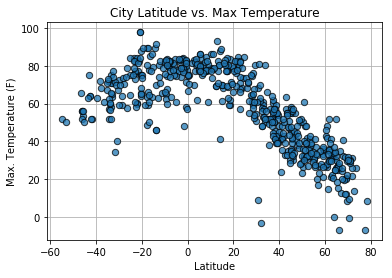

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], edgecolor="black",alpha = 0.75,marker="o", s=40, zorder=2)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(zorder=0)

# Save the figure
plt.savefig("...Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

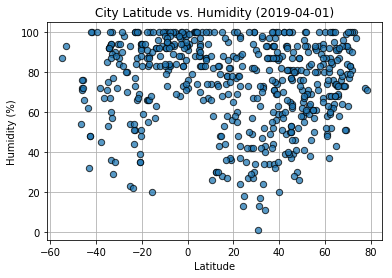

In [9]:
import datetime
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], edgecolor="black",alpha = 0.75,marker="o", s=40, zorder=2)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({datetime.date.today()})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(zorder=0)

# Save the figure
plt.savefig("...Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

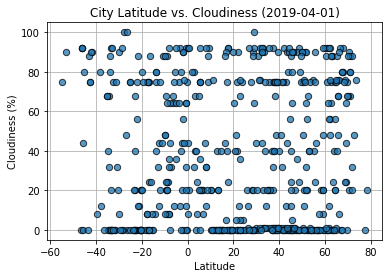

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], edgecolor="black",alpha = 0.75,marker="o", s=40, zorder=2)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({datetime.date.today()})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("...Cloudiness_vs_Latitude.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

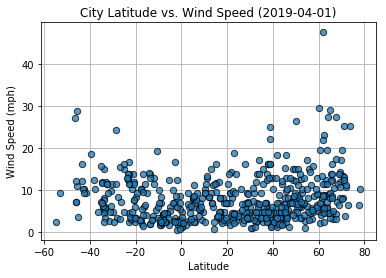

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], edgecolor="black",alpha = 0.75,marker="o", s=40, zorder=2)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({datetime.date.today()})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("...Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

Analysis:
- As it was expected, a correlation between latitude and temperatures is present. However it is interest to notice that northern latitudes are colder than southern latitudes. This could be explained due the seasons being different depending on the pole, but also that there might be a higher concentration of cities in the norther side of the earth. This give us more data of cities closer to the north pole, as not too many cities are closer to the south pole.
-There is a very clear correlation between latitude and the amount of humidity, closer to the equator. However, as we travel out from the equator, the spread of humidity data is higher.
-There is no strong relationship between latitude and cloudiness. However, it is interest how there is a strong accumulation of cities with no clouds.